# 1주차_EDA_과제

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc # 한글 그래픽 처리
import seaborn as sns
import warnings
plt.style.use('seaborn')
warnings.filterwarnings('ignore')
%matplotlib inline
pd.set_option('display.max_columns', 50)

-------------------------------------------------------

## 1. 실습파일에서 Target Encoding 부분을 구현하세요.<span style="color:red">(추가적인 라이브러리 사용금지)</span>

In [2]:
data = pd.read_csv('train.csv')

In [3]:
for i in data:
    data['Initial']=data['Name'].str.extract('([A-Za-z]+)\.') 

In [4]:
#타겟 인코딩
data['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],
                        ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Other','Other','Other'],inplace=True)

a=data.groupby('Initial')['Survived'].mean().reset_index()
a.rename(columns={'Survived':'Initial_encoded'},inplace=True)
pd.merge(data,a,how='left').head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Initial_encoded
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,0.161597
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,0.795276
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,0.704301
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,0.795276
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,0.161597


_____________

## 2. 아파트가 데이터셋을 이용해서 다음을 해보세요:
### - 전처리
    1. 결측치가 있는 변수를 찾아주시고, 그 중 하나를 선택해서 결측치를 창의롭게 처리해보세요. 단순히 변수를 지우는 것은 금지입니다.
    2. 본 데이터셋은 범주형 변수가 많은 데이터입니다. 범주형 변수 7개를 찾으신 뒤, 알맞은 방법으로 인코딩 해주세요.   
       Nominal (명목형) 과ordinal (순서형)을 구분한 뒤 알맞게 인코딩 해주세요.

### - EDA (모든 시각화 결과에 대한 1-2줄 설명 필수입니다)
    3. 연속형 변수들 간 상관관계를 나타내는 correlation matrix 를 만드신뒤, heat map 으로 시각해보세요.
    4. 연속형 변수 5 가지를 선정해 타겟 변수와 관계를 나타내는 그래프로 시각화 해주세요. (타겟 변수는 Hammer Price 입니다)
    5. 3차원 정보 (변수 3 가지) 를 담고있는 도표를 3개 그려주세요. (타겟 변수가 포함 안되도 괜찮습니다.) 

### 2-1) 전처리

In [5]:
data=pd.read_csv('Auction_master_train.csv')

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1933 entries, 0 to 1932
Data columns (total 41 columns):
Auction_key                    1933 non-null int64
Auction_class                  1933 non-null object
Bid_class                      1933 non-null object
Claim_price                    1933 non-null int64
Appraisal_company              1933 non-null object
Appraisal_date                 1933 non-null object
Auction_count                  1933 non-null int64
Auction_miscarriage_count      1933 non-null int64
Total_land_gross_area          1933 non-null float64
Total_land_real_area           1933 non-null float64
Total_land_auction_area        1933 non-null float64
Total_building_area            1933 non-null float64
Total_building_auction_area    1933 non-null float64
Total_appraisal_price          1933 non-null int64
Minimum_sales_price            1933 non-null int64
First_auction_date             1933 non-null object
Final_auction_date             1933 non-null object
Final_resu

In [9]:
data.head()

,Auction_key,Auction_class,Bid_class,Claim_price,Appraisal_company,Appraisal_date,Auction_count,Auction_miscarriage_count,Total_land_gross_area,Total_land_real_area,Total_land_auction_area,Total_building_area,Total_building_auction_area,Total_appraisal_price,Minimum_sales_price,First_auction_date,Final_auction_date,Final_result,Creditor,addr_do,addr_si,addr_dong,addr_li,addr_san,addr_bunji1,addr_bunji2,addr_etc,Apartment_usage,Preserve_regist_date,Total_floor,Current_floor,Specific,Share_auction_YorN,road_name,road_bunji1,road_bunji2,Close_date,Close_result,point.y,point.x,Hammer_price
0,2687,임의,개별,1766037301,정명감정,2017-07-26 00:00:00,2,1,12592.0,37.35,37.35,181.77,181.77,836000000,668800000,2018-02-13 00:00:00,2018-03-20 00:00:00,낙찰,베리타스자산관리대부,부산,해운대구,우동,NaN,N,1398.0,NaN,해운대엑소디움 5층 101-502호,주상복합,2009-07-14 00:00:00,45,5,NaN,N,해운대해변로,30.0,NaN,2018-06-14 00:00:00,배당,35.162717,129.137048,760000000
1,2577,임의,일반,152946867,희감정,2016-09-12 00:00:00,2,1,42478.1,18.76,18.76,118.38,118.38,1073000000,858400000,2016-12-29 00:00:00,2017-02-02 00:00:00,낙찰,흥국저축은행,부산,해운대구,우동,NaN,N,1407.0,NaN,해운대두산위브더제니스 103동 51층 5103호,아파트,2011-12-16 00:00:00,70,51,NaN,N,마린시티2로,33.0,NaN,2017-03-30 00:00:00,배당,35.156633,129.145068,971889999
2,2197,임의,개별,11326510,혜림감정,2016-11-22 00:00:00,3,2,149683.1,71.00,71.00,49.94,49.94,119000000,76160000,2017-07-28 00:00:00,2017-10-13 00:00:00,낙찰,국민은행,부산,사상구,모라동,NaN,N,552.0,NaN,백양그린 206동 14층 1403호,아파트,1992-07-31 00:00:00,15,14,NaN,N,모라로110번길,88.0,NaN,2017-12-13 00:00:00,배당,35.184601,128.996765,93399999
3,2642,임의,일반,183581724,신라감정,2016-12-13 00:00:00,2,1,24405.0,32.98,32.98,84.91,84.91,288400000,230720000,2017-07-20 00:00:00,2017-11-02 00:00:00,낙찰,고려저축은행,부산,남구,대연동,NaN,N,243.0,23.0,대연청구 109동 11층 1102호,아파트,2001-07-13 00:00:00,20,11,NaN,N,황령대로319번가길,110.0,NaN,2017-12-27 00:00:00,배당,35.154180,129.089081,256899000
4,1958,강제,일반,45887671,나라감정,2016-03-07 00:00:00,2,1,774.0,45.18,45.18,84.96,84.96,170000000,136000000,2016-07-06 00:00:00,2016-08-03 00:00:00,낙찰,Private,부산,사하구,괴정동,NaN,N,399.0,2.0,동조리젠시 7층 703호,아파트,2001-11-27 00:00:00,7,7,NaN,N,오작로,51.0,NaN,2016-10-04 00:00:00,배당,35.099630,128.998874,158660000


In [10]:
data.isnull().sum().sort_values(ascending=False)[:6]
#주소(리) - 없는 경우 대치 불가능
#특이사항 - 없는 경우 그냥 '없음'으로 대치하기 
#도로명 번지2 - 없는 경우 대치 불가능
#주소 번지2 - 없는 경우 대치 불가능
#도로명 번지1 - 수도 적절하고 번지명 1번째라 다 존재 할듯
#주소 번지 1 - 너무 적은 수 (재미없을듯)

addr_li        1910
Specific       1869
road_bunji2    1778
addr_bunji2    1044
road_bunji1      24
addr_bunji1       4
dtype: int64

### 2-1-1) 대치 : 제가 과제로 대치해볼 피쳐는 특이사항과 도로명 번지 1입니다
    -  특이사항은 없는 경우 '없음' 으로 대치해 줄 것입니다
    -  도로명 번지1은 예전 건물이거나 누락된 경우 등으로 생각되어, 직접 구글링후 대치해 줄 것입니다.  
    
    * 결측값이 대부분 비메트릭이고, 찾으면 실제로 존재하는 값일 것 같아서 통계적 대치는 하지 않기로 했습니다.

In [12]:
#특이사항
data.loc[data['Specific'].isnull(),'Specific']='없음'

In [13]:
# 도로명 번지1
data.loc[data['road_bunji1'].isnull(),['addr_do','addr_si','addr_dong','addr_etc']].apply(lambda x:' '.join(x),1)

29                           부산 동래구 낙민동 ,237-2 삼주 8층 801호
84                           부산 동래구 낙민동 ,237-2 삼주 7층 701호
122                          부산 동래구 낙민동 ,237-2 삼주 6층 602호
224                        부산 동래구 낙민동 ,237-2 삼주 11층 1101호
239                        부산 동래구 낙민동 ,237-2 삼주 10층 1001호
311                          부산 동래구 낙민동 ,237-2 삼주 9층 901호
370                        부산 동래구 낙민동 ,237-2 삼주 15층 1502호
464                        부산 동래구 낙민동 ,237-2 삼주 12층 1201호
491                        부산 동래구 낙민동 ,237-2 삼주 13층 1302호
496                          부산 동래구 낙민동 ,237-2 삼주 4층 401호
560                        부산 동래구 낙민동 ,237-2 삼주 14층 1402호
564     부산 해운대구 중동 ,1817,1819 해운대힐스테이트위브 T-201동 39층 3906호
613                          부산 동래구 낙민동 ,237-2 삼주 7층 702호
637                        부산 동래구 낙민동 ,237-2 삼주 10층 1002호
656                          부산 동래구 낙민동 ,237-2 삼주 5층 501호
658                        부산 동래구 낙민동 ,237-2 삼주 14층 1401호
830                       서울 광진구 구의동 세림리오빌 101동 12층 1201호
1016          

In [14]:
# 구글링을 통해 얻은 도로명과 번지
road=['충렬대로 271',
'좌동순환로433번길 30',
'아차산로 451',
'매봉로4길 15',
'한천로 988',
'우이천로 367',
'서울시 금천구 한내로 62',
'천왕로 96',
'등촌로13다길 29', 
'서울시 구로구 공원로 27'] 

In [15]:
len(road)==data.loc[data['road_bunji1'].isnull(),['addr_do','addr_si','addr_dong']].apply(lambda x:' '.join(x),1).nunique()

True

In [16]:
road_name=pd.Series(road).apply(lambda x: x[:-3])
road_bunji=pd.Series(road).apply(lambda x: x[-3:]).astype('int')

In [17]:
rownum=data.loc[data['road_bunji1'].isnull(),].index

In [18]:
data.loc[rownum,'road_name']=road_name
data.loc[rownum,'road_bunji1']=road_bunji
region=data['addr_do']

### 2-1-2) 인코딩 : 라벨 인코딩을 할 변수가 딱히 보이지 않아, 그냥 OHE 

In [19]:
#인코딩
data=pd.concat([data.drop(['Auction_class'], axis=1),pd.get_dummies(data.Auction_class) ], axis=1)
data=pd.concat([data.drop(['Bid_class'], axis=1),pd.get_dummies(data.Bid_class) ], axis=1)
data=pd.concat([data.drop(['Apartment_usage'], axis=1),pd.get_dummies(data.Apartment_usage) ], axis=1)
data=pd.concat([data.drop(['Appraisal_company'], axis=1),pd.get_dummies(data.Appraisal_company) ], axis=1)
data=pd.concat([data.drop(['addr_si'], axis=1),pd.get_dummies(data.addr_si) ], axis=1)
data=pd.concat([data.drop(['addr_do'], axis=1),pd.get_dummies(data.addr_do) ], axis=1)
data=pd.concat([data.drop(['Close_result'], axis=1),pd.get_dummies(data.Close_result) ], axis=1)

### 2-2) EDA

In [20]:
from matplotlib import rc # 한글 그래픽 처리
plt.rc('font', family='NanumGothic')
plt.rc('axes', unicode_minus=False)

In [21]:
EDA=data.iloc[:,:34]._get_numeric_data()

In [22]:
cn=list(EDA)

In [23]:
from sklearn.preprocessing import StandardScaler
EDA2=pd.DataFrame(StandardScaler().fit_transform(EDA))
EDA2.columns=cn
#혹시 사용할 일 있을까봐 표준화

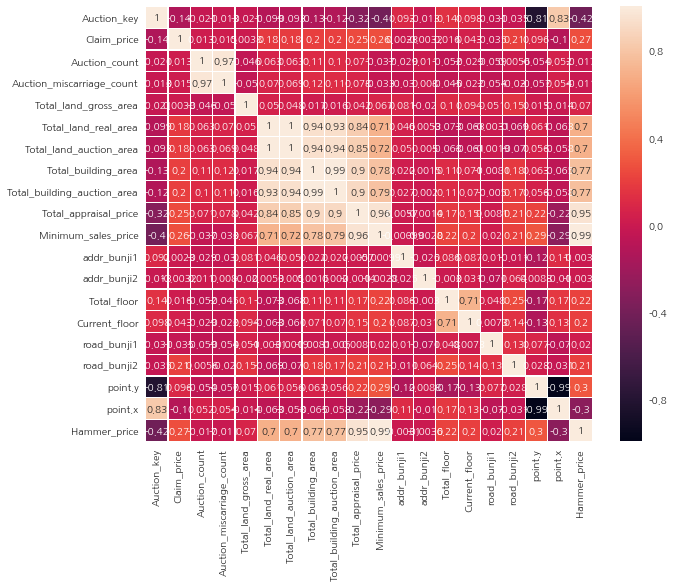

In [24]:
sns.heatmap(EDA.corr(),annot=True,linewidths=0.2) 
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

# 비슷한 변수들이 너무 많아 명확한 관계를 보기 어려움
# Hammer Price와 상관계수가 높은 변수는, AREA류

In [25]:
EDA['region']=region
EDA2['region']=region

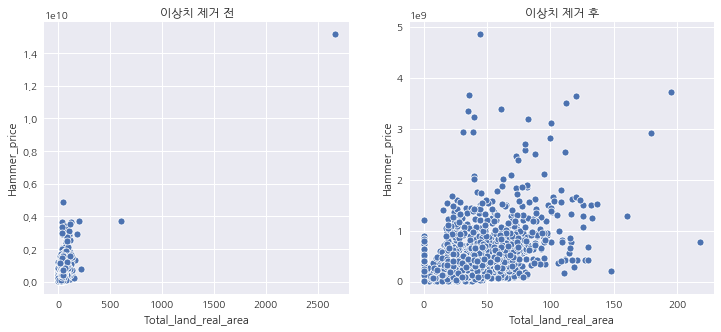

In [26]:
#1.토지 실 면적과 낙찰가
f, ax = plt.subplots(1, 2, figsize=(12,5))
sns.scatterplot(x="Total_land_real_area", y="Hammer_price", data=EDA,ax=ax[0])
ax[0].set_title('이상치 제거 전')
sns.scatterplot(x="Total_land_real_area", y="Hammer_price", data=EDA.query('Total_land_real_area<500'))
ax[1].set_title('이상치 제거 후')
plt.show() # 대체적으로 양의 상관관계의 형식을 보임, 확실히 넓을 수록 비싸다.

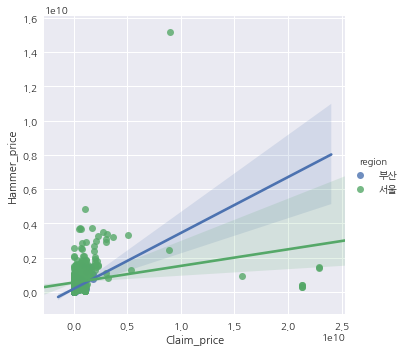

In [27]:
#2. 청구금액과 낙찰가
sns.lmplot(x="Claim_price", y="Hammer_price", hue="region", data=EDA, fit_reg=True)
plt.show()
# 대체적으로 부산이 서울에 비해 Claim_price가 증가하면 Hammer Price가 증가하는 경향을 보임

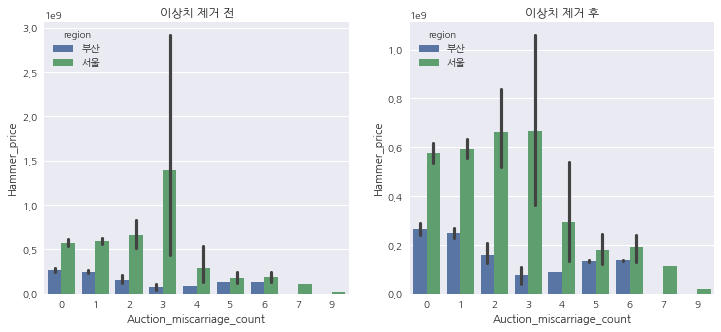

In [28]:
#유찰횟수와 낙찰가
f, ax = plt.subplots(1, 2, figsize=(12,5))
sns.barplot(x="Auction_miscarriage_count", y="Hammer_price", hue="region", data=EDA,ax=ax[0])
ax[0].set_title('이상치 제거 전')
sns.barplot(x="Auction_miscarriage_count", y="Hammer_price", hue="region", data=EDA.query('Hammer_price<10000000000'),ax=ax[1])
ax[1].set_title('이상치 제거 후')
plt.show()
#서울의 경우 유찰횟수가 적을 수록 가격이 비싼경향 ( 고가의 매물이 들어오면 바로 팔리나? )
#부산의 경우 3,4회 까지 감소했다가, 이후 가격이 상승하는 경향 ( 고가의 매물의 경우 입찰을 주저하나? )

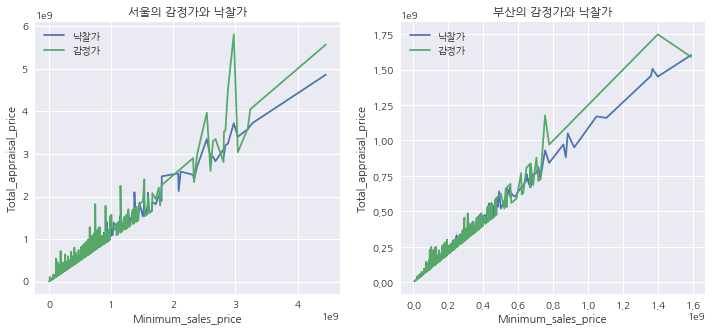

In [29]:
#감정가와 낙찰가
f, ax = plt.subplots(1, 2, figsize=(12,5))
sns.lineplot(x="Minimum_sales_price", y="Hammer_price" ,data=EDA.query('region=="서울"&Hammer_price<10000000000',),ax=ax[0],label='낙찰가')
sns.lineplot(x="Minimum_sales_price", y="Total_appraisal_price" ,data=EDA.query('region=="서울"&Hammer_price<10000000000',),ax=ax[0],label='감정가')
ax[0].set_title('서울의 감정가와 낙찰가')
sns.lineplot(x="Minimum_sales_price", y="Hammer_price" ,data=EDA.query('region=="부산"'),ax=ax[1],label='낙찰가')
sns.lineplot(x="Minimum_sales_price", y="Total_appraisal_price" ,data=EDA.query('region=="부산"',),ax=ax[1],label='감정가')
ax[1].set_title('부산의 감정가와 낙찰가')
plt.show()

#대체적으로 일치하지만 가격이 높아지면 대부분 감정가보다 낙찰자가 낮은 경향을 보인다

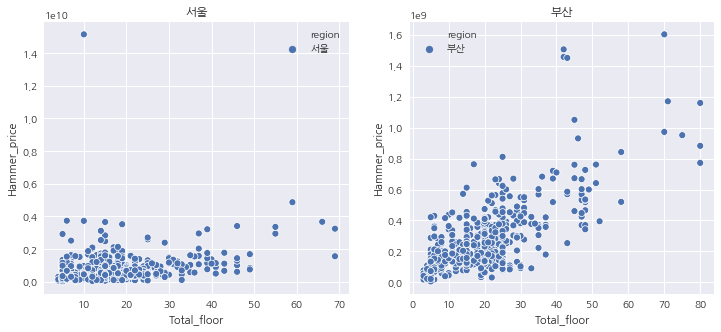

In [30]:
# 층 수와 가격
f, ax = plt.subplots(1, 2, figsize=(12,5))
sns.scatterplot(x="Total_floor", y="Hammer_price", data=EDA.query('region=="서울"'),ax=ax[0],hue='region')
ax[0].set_title('서울')
sns.scatterplot(x="Total_floor", y="Hammer_price", data=EDA.query('region=="부산"'),ax=ax[1],hue='region')
ax[1].set_title('부산')
plt.show() # 서울의 경우 큰 상관관계를 확인하기 힘들지만, 부산의 경우는 눈에 띌 정도로 큰 상관관계를 보인다.

Text(0.5, 1.0, '부산')

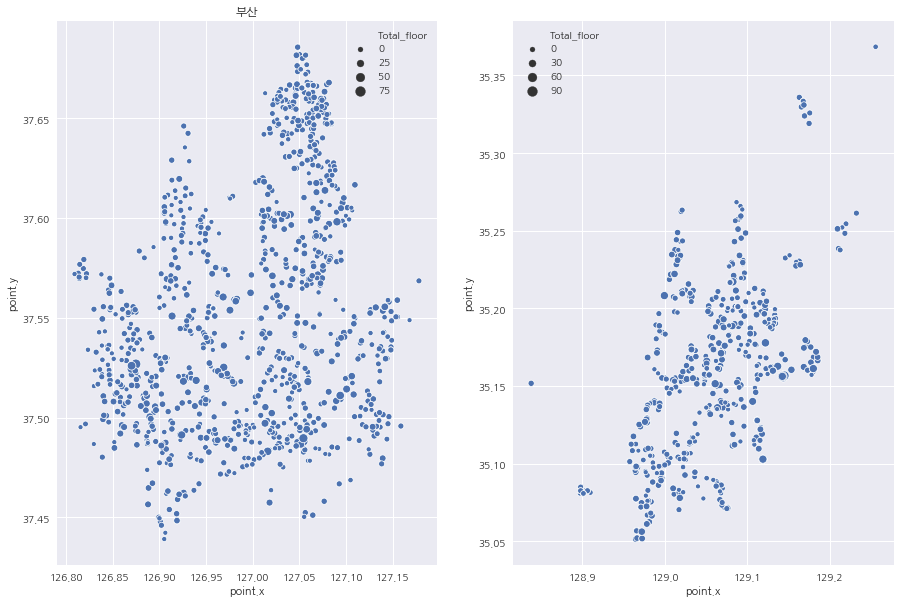

In [32]:
#1. x좌표,y좌표,층수를 이용한 시각화
f, ax = plt.subplots(1, 2, figsize=(15,10))
sns.scatterplot(x="point.x", y="point.y",size='Total_floor' ,data=EDA.query('region=="서울"'),ax=ax[0])
ax[0].set_title('서울')
sns.scatterplot(x="point.x", y="point.y",size='Total_floor' ,data=EDA.query('region=="부산"'),ax=ax[1])
ax[0].set_title('부산')
#같은 지역내에서는 세부지역별 층수의 유의미한 차이가 발견되지 않는다.
#굳이 꼽자면 부산은 중앙에서 멀어질수록 원이 작아지는(층수가 낮아지는) 듯 하다.

Text(0.5, 1.0, '부산의 낙찰가격')

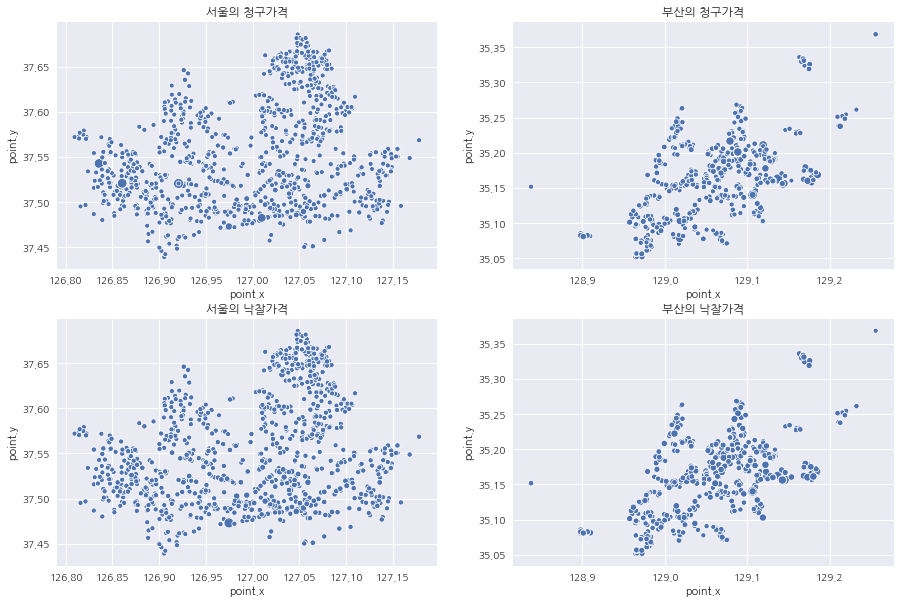

In [33]:
#2. x좌표,y좌표,청구가,낙찰가를 이용한 시각화
f, ax = plt.subplots(2, 2, figsize=(15,10))
sns.scatterplot(x="point.x", y="point.y",size='Claim_price' ,data=EDA.query('region=="서울"'),ax=ax[0,0],legend=False)
ax[0,0].set_title('서울의 청구가격')
sns.scatterplot(x="point.x", y="point.y",size='Claim_price' ,data=EDA.query('region=="부산"'),ax=ax[0,1],legend=False)
ax[0,1].set_title('부산의 청구가격')
sns.scatterplot(x="point.x", y="point.y",size='Hammer_price' ,data=EDA.query('region=="서울"'),ax=ax[1,0],legend=False)
ax[1,0].set_title('서울의 낙찰가격')
sns.scatterplot(x="point.x", y="point.y",size='Hammer_price' ,data=EDA.query('region=="부산"'),ax=ax[1,1],legend=False)
ax[1,1].set_title('부산의 낙찰가격')
#청구가격 :서울은 좌측 아래지역에 큰 점이 몇 개 존재하며 부산은 중앙에 여러개 존재한다
#낙찰가격 :서울은 조금의 괴리가 있으며, 중앙 남쪽 부분에 큰 점이 존재한다 부산은 비슷한 분포를 보인다.

Text(0, 0.5, 'y축')

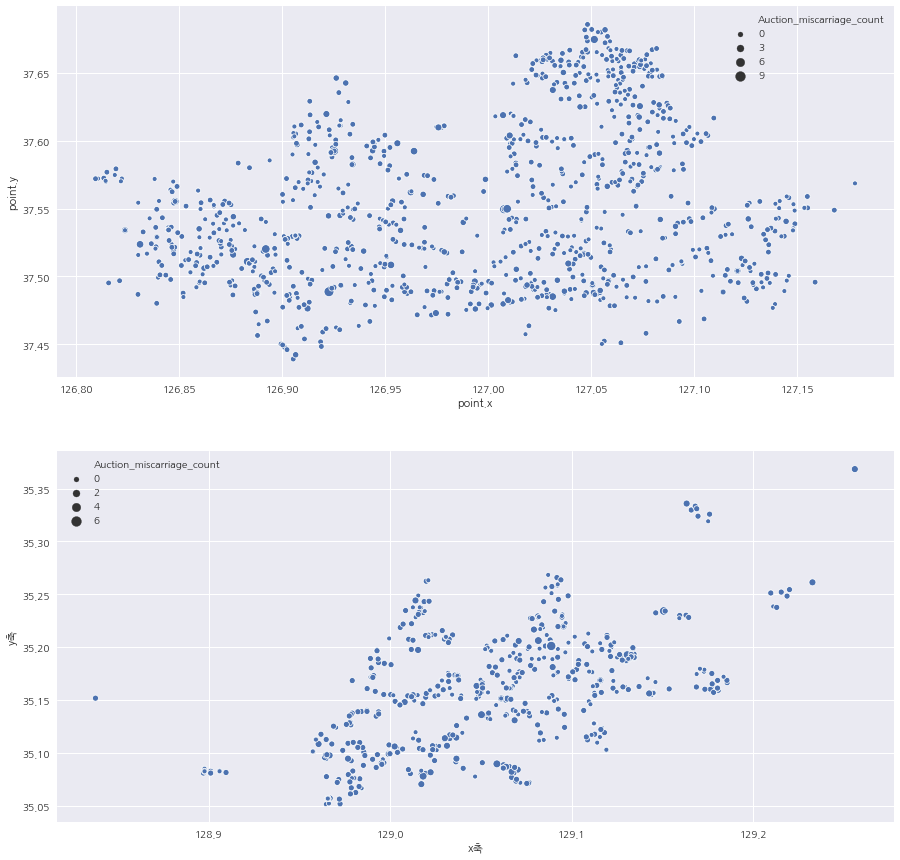

In [34]:
#3. x좌표,y좌표,청구가,유찰횟수를 이용한 시각화
f, ax = plt.subplots(2, 1, figsize=(15,15))
sns.scatterplot(x="point.x", y="point.y",size='Auction_miscarriage_count' ,data=EDA.query('region=="서울"'),ax=ax[0])
plt.xlabel('x축')
plt.ylabel('y축')
sns.scatterplot(x="point.x", y="point.y",size='Auction_miscarriage_count' ,data=EDA.query('region=="부산"'),ax=ax[1])
plt.xlabel('x축')
plt.ylabel('y축')
#같은 지역내에서는 세부지역별 유찰횟수의 유의한 차이가 발견되지 않는다.